# Time Series forecasting with Facebook Prophet

## What you'll learn in this course

With Machine Learning comes very specific data: Time series. That type of data should be treated very specifically. In this course, you'll learn:

- How to handle Time Series data
- What are the common models
- Create time series forecasting with Prophet
- The model behind Prophet
- Include seasonality, holidays and other specific events in your forecast


## What are Time Series 🤔🤔

Simply put time series are data based on time. For example you can have:

- Sales forecast
- Spread of a virus over time
- Stock prices prediction
- Weather forecasting
- ...


## Models associated with Time Series 📈📈

When you are doing time series forecasting. You can use plenty different types of models. Among the most popular are:

- Moving averages
- Auto-correlations
- Autoregressive Integrated Moving Average (ARIMA)

## Facebook Prophet 🔮🔮

Prophet is an open source project used for Time Series Forecasting. Basically, Prophet rely on three components:

$y(t) = g(t) + s(t) + h(t) + \varepsilon_{t}$

where

$y(t)$ - forecast

$g(t)$ - trend

$s(t)$ - seasonality or periodical changes

$h(t)$ - holidays

$\varepsilon_{t}$ - Noise

We'll review each of these components in this course.


## Install Prophet

<Note type="warning" title="Installation and running">

The latest version of Prophet can't be installed on JULIE's workspaces. The following code examples have to be executed in [Google colab](https://colab.research.google.com/)

</Note>


## Example with Finance Data

For the rest of the course, we'll be using financial data from Yahoo and its `yfinance` library


In [7]:
pip install -q prophet

Note: you may need to restart the kernel to use updated packages.


In [8]:
import prophet

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


In [9]:
!pip install -q yfinance

[*********************100%***********************]  1 of 1 completed


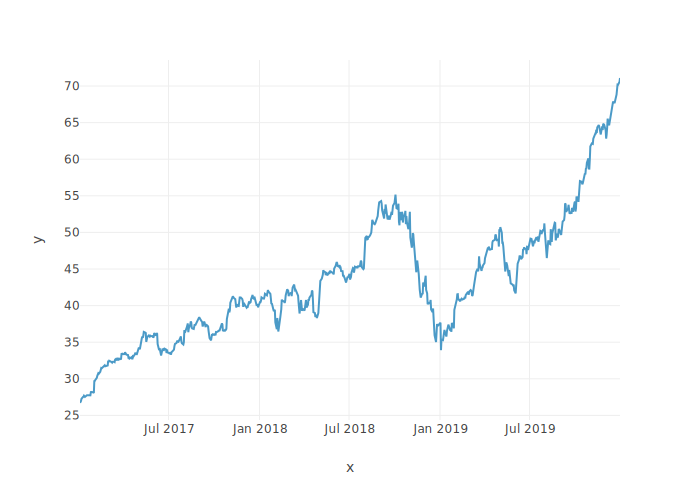

In [10]:
# Import the plotting library
import matplotlib.pyplot as plt
import yfinance as yf

# Get the data of the stock AAPL
data = yf.download("AAPL", "2017-01-01", "2020-01-01")
data.columns = ["Close", "High", "Low", "Open", "Volume"]

# Plot the close price of the AAPL
fig = px.line(x=data["Close"].index, y=data["Close"])
fig.show()

Our goal is going to predict future stock prices of Apple Inc.


## Forecasting 🧙‍♂️🧙‍♂️

The best thing about Prophet is that it follows the same principles as `sklearn`. Making it very easy to use. Let's show a quick example.

First Prophet needs to receive a DataFrame with the:

- `ds` column corresponding to the time in YYYY-MM-DD format
- `y` column corresponding to your target variable


In [11]:
import pandas as pd

# Format a dataframe for Prophet where you need to have a 'ds' column for time and 'y' column for prediction

p_df = pd.DataFrame({"ds": data.index, "y": data["Open"]}).reset_index(drop=True)

p_df["ds"] = p_df["ds"].dt.tz_localize(
    None
)  # remove timezone for compatibility with latest version of prophet

p_df.head()

,ds,y
0,2017-01-03,26.781487
1,2017-01-04,26.793039
2,2017-01-05,26.809243
3,2017-01-06,27.008132
4,2017-01-09,27.278719


Next, we'll instanciate a `Prophet` instance and `fit` it to our DataFrame


In [12]:
from prophet import Prophet

m = Prophet()
m.fit(p_df)

13:54:58 - cmdstanpy - INFO - Chain [1] start processing
13:54:59 - cmdstanpy - INFO - Chain [1] done processing


Now we'll create predictions for future dates with Prophet


In [13]:
future = m.make_future_dataframe(periods=100)  # We create 100 more days
future

,ds
0,2017-01-03
1,2017-01-04
2,2017-01-05
3,2017-01-06
4,2017-01-09
...,...
849,2020-04-05
850,2020-04-06
851,2020-04-07
852,2020-04-08


Let's make our predictions


In [14]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
849,2020-04-05,75.661024,73.765723,84.815763,70.199635,81.124213,3.656155,3.656155,3.656155,0.647834,0.647834,0.647834,3.008321,3.008321,3.008321,0.0,0.0,0.0,79.317179
850,2020-04-06,75.754105,72.606396,83.903090,70.194334,81.290339,2.585355,2.585355,2.585355,-0.364929,-0.364929,-0.364929,2.950284,2.950284,2.950284,0.0,0.0,0.0,78.339460
851,2020-04-07,75.847186,72.481387,84.250187,70.175719,81.496306,2.604025,2.604025,2.604025,-0.283465,-0.283465,-0.283465,2.887490,2.887490,2.887490,0.0,0.0,0.0,78.451211
852,2020-04-08,75.940267,72.706072,84.068953,70.155552,81.702272,2.603748,2.603748,2.603748,-0.217087,-0.217087,-0.217087,2.820835,2.820835,2.820835,0.0,0.0,0.0,78.544016
853,2020-04-09,76.033349,72.578907,84.555744,70.177557,81.899256,2.543908,2.543908,2.543908,-0.207434,-0.207434,-0.207434,2.751342,2.751342,2.751342,0.0,0.0,0.0,78.577257


And finally plot the results with plotly


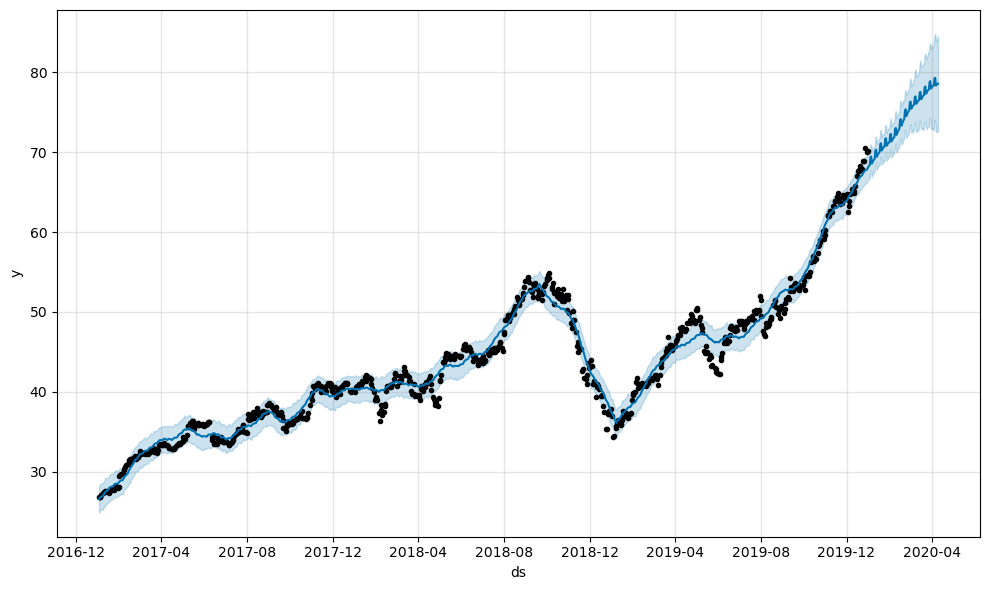

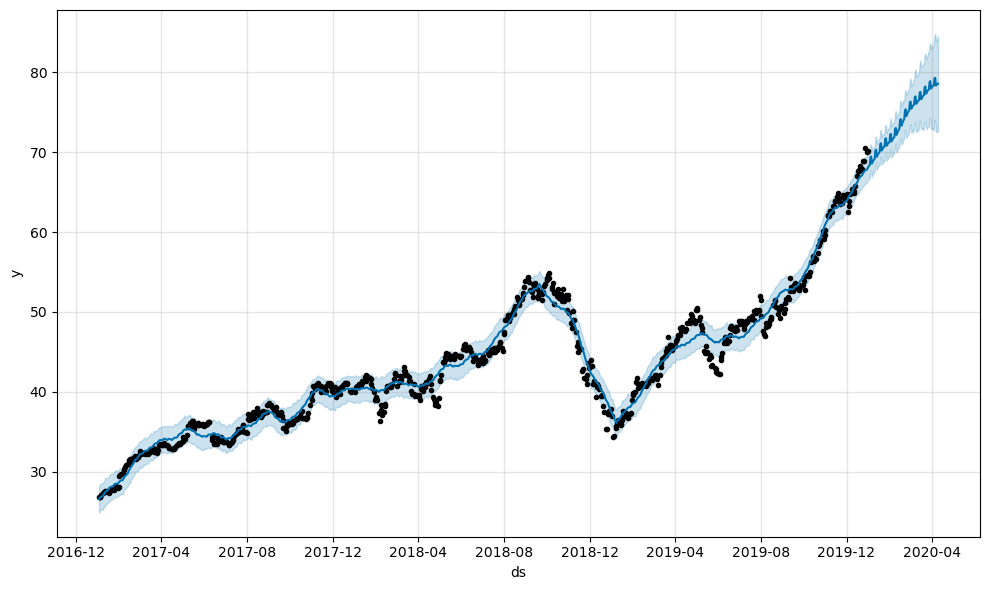

In [15]:
m.plot(forecast)

You can also plot each components of your trend. So that you can see the seasonality.


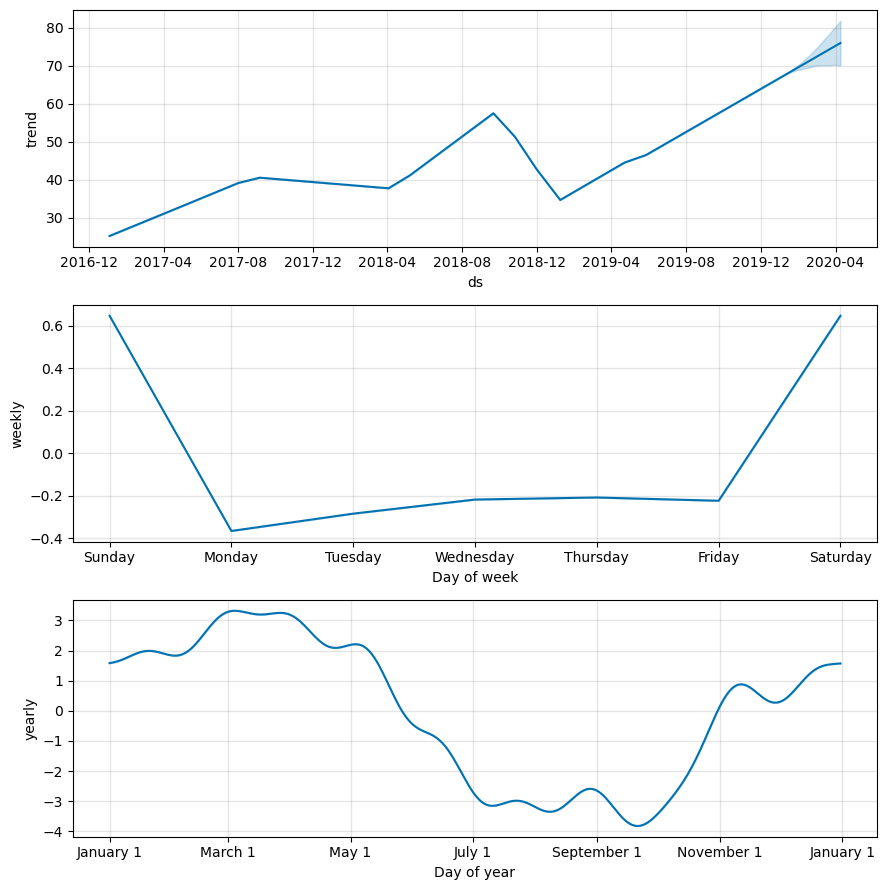

In [16]:
fig2 = m.plot_components(forecast)

## Handle Seasonality

One very cool feature that you can use with Prophet is to add seasonality. For example, you can add country holidays.


In [17]:
m = Prophet()
m.add_country_holidays(country_name="US")
m.fit(p_df)

13:55:00 - cmdstanpy - INFO - Chain [1] start processing
13:55:00 - cmdstanpy - INFO - Chain [1] done processing


Check all the added holidays


In [18]:
m.train_holiday_names

0                 New Year's Day
1      New Year's Day (observed)
2                   Memorial Day
3               Independence Day
4                      Labor Day
5                   Veterans Day
6        Veterans Day (observed)
7               Thanksgiving Day
8                  Christmas Day
9     Martin Luther King Jr. Day
10         Washington's Birthday
11                  Columbus Day
dtype: object

Check now its impact on your forecast


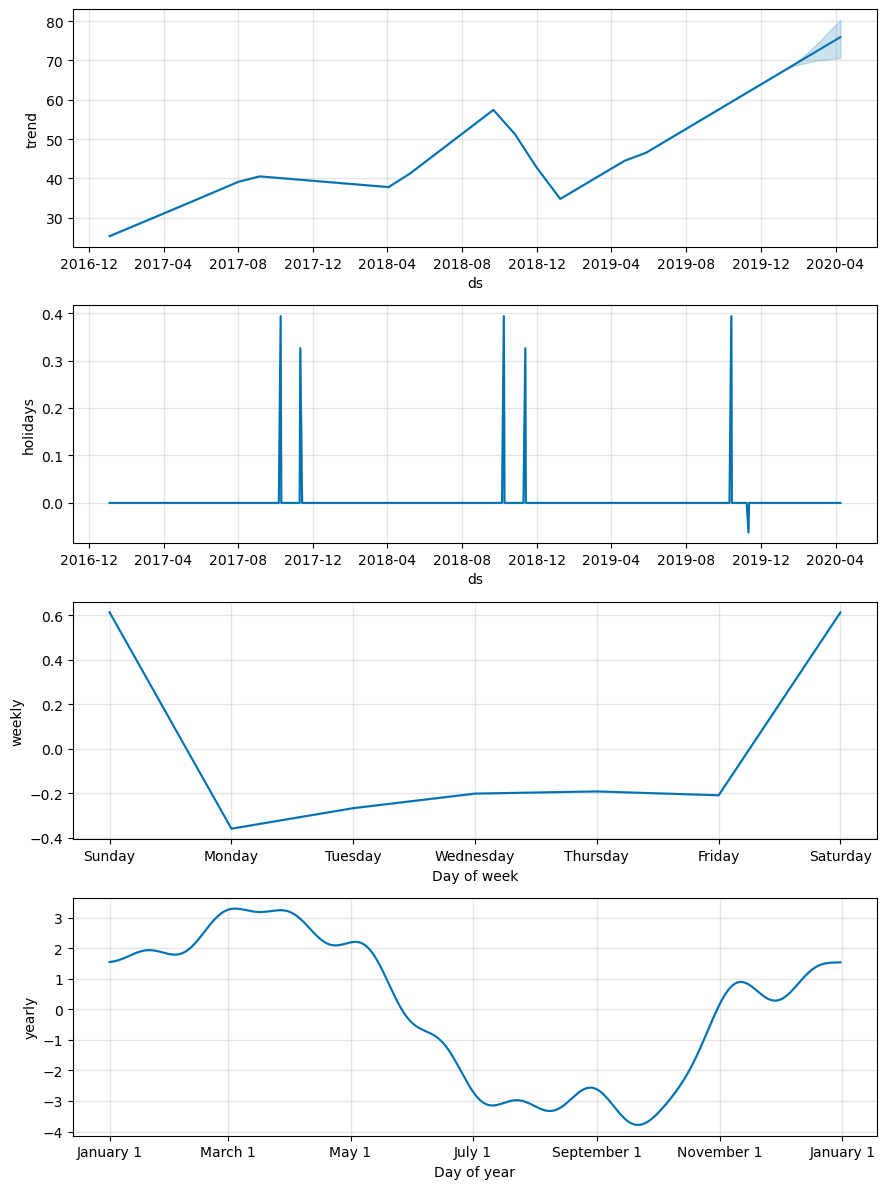

In [19]:
forecast = m.predict(future)
fig = m.plot_components(forecast)

You can also add manual holidays by providing a `holidays` DataFrame


In [20]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Columbus Day,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-03,25.269428,24.950747,28.193110,25.269428,25.269428,0.0,0.0,0.0,0.0,...,-0.266464,-0.266464,-0.266464,1.567795,1.567795,1.567795,0.0,0.0,0.0,26.570759
1,2017-01-04,25.334797,25.143619,28.399137,25.334797,25.334797,0.0,0.0,0.0,0.0,...,-0.200995,-0.200995,-0.200995,1.582309,1.582309,1.582309,0.0,0.0,0.0,26.716111
2,2017-01-05,25.400167,25.267073,28.493876,25.400167,25.400167,0.0,0.0,0.0,0.0,...,-0.191245,-0.191245,-0.191245,1.599880,1.599880,1.599880,0.0,0.0,0.0,26.808802
3,2017-01-06,25.465537,25.253220,28.641951,25.465537,25.465537,0.0,0.0,0.0,0.0,...,-0.208582,-0.208582,-0.208582,1.620421,1.620421,1.620421,0.0,0.0,0.0,26.877376
4,2017-01-09,25.661645,25.285999,28.645374,25.661645,25.661645,0.0,0.0,0.0,0.0,...,-0.358585,-0.358585,-0.358585,1.696866,1.696866,1.696866,0.0,0.0,0.0,26.999926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,2020-04-05,75.584379,73.904150,84.016635,70.631629,79.741121,0.0,0.0,0.0,0.0,...,0.612935,0.612935,0.612935,3.002058,3.002058,3.002058,0.0,0.0,0.0,79.199372
850,2020-04-06,75.677219,73.003500,82.733285,70.632155,79.879061,0.0,0.0,0.0,0.0,...,-0.358585,-0.358585,-0.358585,2.944517,2.944517,2.944517,0.0,0.0,0.0,78.263151
851,2020-04-07,75.770059,72.769109,83.280553,70.638354,80.023528,0.0,0.0,0.0,0.0,...,-0.266464,-0.266464,-0.266464,2.882252,2.882252,2.882252,0.0,0.0,0.0,78.385847
852,2020-04-08,75.862899,73.230377,83.761919,70.658147,80.201905,0.0,0.0,0.0,0.0,...,-0.200995,-0.200995,-0.200995,2.816153,2.816153,2.816153,0.0,0.0,0.0,78.478057


In [21]:
thanksgiving = pd.DataFrame(
    {
        "holiday": "thanksgiving",
        "ds": pd.to_datetime(["2017-11-26", "2018-11-26", "2019-11-26"]),
        "lower_window": 0,
        "upper_window": 1,
    }
)

m = Prophet(holidays=thanksgiving)
# m.add_country_holidays(country_name='US')
m.fit(p_df)

13:55:00 - cmdstanpy - INFO - Chain [1] start processing
13:55:00 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
thanksgiving

,holiday,ds,lower_window,upper_window
0,thanksgiving,2017-11-26,0,1
1,thanksgiving,2018-11-26,0,1
2,thanksgiving,2019-11-26,0,1


Let's check the impact of a holiday simply by checking if we have positive or negative correlations in our prediction dataframe.


In [23]:
forecast = m.predict(future)

In [24]:
forecast[forecast["ds"] == "2017-11-27"]["thanksgiving"]

227   -0.176762
Name: thanksgiving, dtype: float64

In [25]:
forecast.thanksgiving.value_counts()

thanksgiving
 0.000000    849
-0.176762      3
-0.652262      2
Name: count, dtype: int64

## Multi-variate forecasting

Sometimes, you might want to create forecast not only with times but with also other variables. Prophet calls it Regressors. To add a regressor, you can simply do:


In [27]:
# Get the data of Microsoft Stock
msft = yf.download("MSFT", "2017-01-01", "2020-01-01")
msft.columns = ["Close", "High", "Low", "Open", "Volume"]

# Preprocess the data
msft = pd.DataFrame({"ds": msft.index, "msft_stock_price": msft["Open"]}).reset_index(
    drop=True
)


msft.head()

[*********************100%***********************]  1 of 1 completed


,ds,msft_stock_price
0,2017-01-03,56.791067
1,2017-01-04,56.510677
2,2017-01-05,56.248383
3,2017-01-06,56.347883
4,2017-01-09,56.763934


Let's incorporate this column in our DataFrame


In [28]:
p_df["msft_stock_price"] = msft["msft_stock_price"]
p_df.head()

,ds,y,msft_stock_price
0,2017-01-03,26.781487,56.791067
1,2017-01-04,26.793039,56.510677
2,2017-01-05,26.809243,56.248383
3,2017-01-06,27.008132,56.347883
4,2017-01-09,27.278719,56.763934


In [29]:
m = Prophet()
m.add_regressor("msft_stock_price")

However, once you added a regressor, you absolutely need to have it in your train set AND in your predictions. Therefore, let's split our dataset


In [30]:
# Train_test_split
train_size = int(0.8 * len(p_df))


X_train = p_df.iloc[:train_size, :]
X_test = p_df.iloc[train_size:, :]

X_train.head()

,ds,y,msft_stock_price
0,2017-01-03,26.781487,56.791067
1,2017-01-04,26.793039,56.510677
2,2017-01-05,26.809243,56.248383
3,2017-01-06,27.008132,56.347883
4,2017-01-09,27.278719,56.763934


In [31]:
m.fit(X_train)

13:55:40 - cmdstanpy - INFO - Chain [1] start processing
13:55:40 - cmdstanpy - INFO - Chain [1] done processing


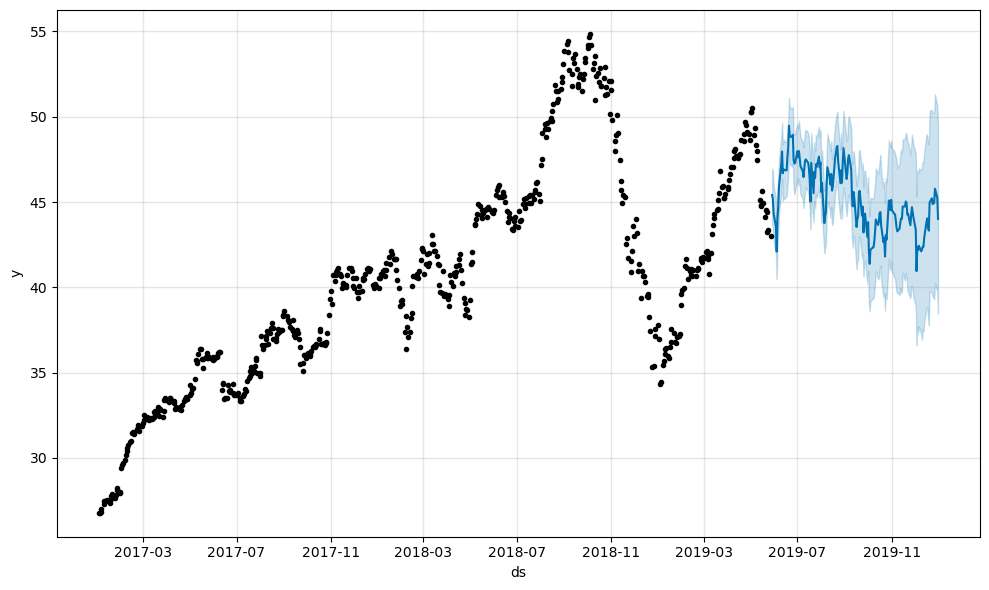

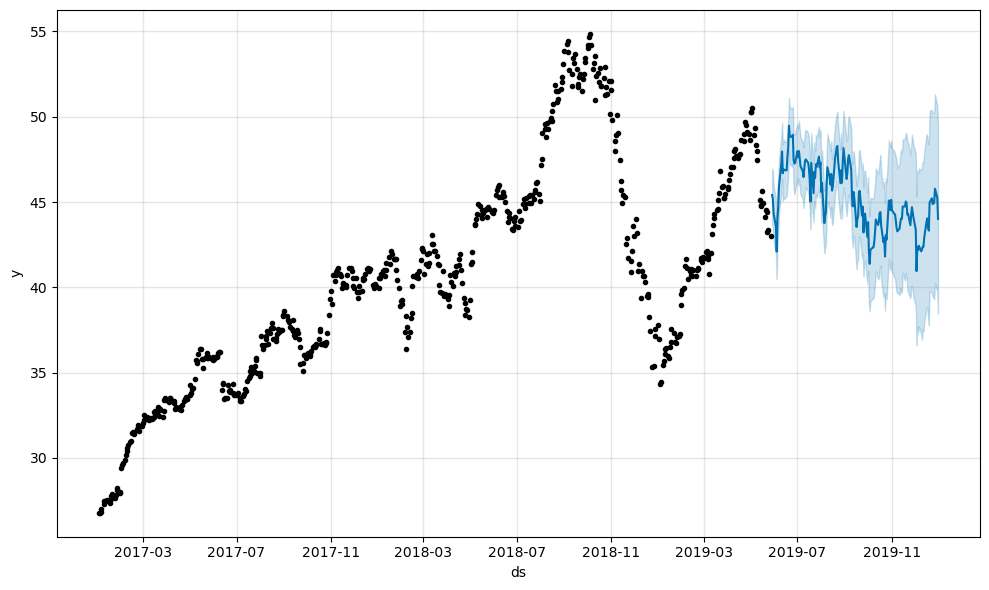

In [32]:
# Forecast
forecast = m.predict(X_test)

# Viz
m.plot(forecast)

In [33]:
future = m.make_future_dataframe(periods=1)
future

,ds
0,2017-01-03
1,2017-01-04
2,2017-01-05
3,2017-01-06
4,2017-01-09
...,...
599,2019-05-22
600,2019-05-23
601,2019-05-24
602,2019-05-28


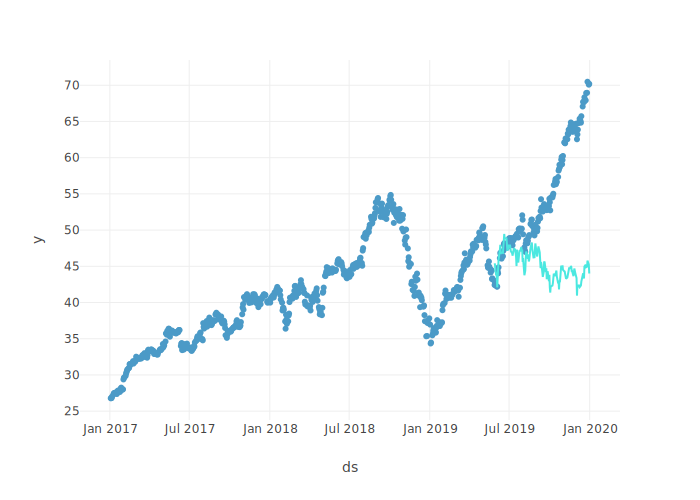

In [34]:
fig = px.scatter(p_df, x="ds", y="y")
fig.add_trace(px.line(forecast, x="ds", y="yhat").data[0])
fig["data"][1]["line"]["color"] = "#4BE8E0"
fig.show()

## Resources

- [Seasonality, Holiday Effects, And Regressors](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#additional-regressors)
- [Forecasting at Scale](https://peerj.com/preprints/3190/)
- [Introduction to Time Series Analysis](https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc4.htm)
- [Time Series](https://en.wikipedia.org/wiki/Time_series#:~:text=A%20time%20series%20is%20a,sequence%20of%20discrete%2Dtime%20data.)
